In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Data Science assignment\EDA2\EDA2\adult_with_headers.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Information of dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking for missing data

In [6]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### I think captial loss and captial gain are not much useful beacuse didn't have much data to analysis mostly 0 values in the two features

In [7]:
data.drop(['capital_gain','capital_loss'],axis=1,inplace=True)

In [8]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


#### Seperate categorical and numerical features

In [9]:
int_columns = data.select_dtypes(include='int').columns
cat_columns = data.select_dtypes(include='object').columns

# Print the separated columns
print("Integer Columns:", int_columns)
print("-------------------------------------")

print("Categorical Columns:", cat_columns)

Integer Columns: Index(['age', 'fnlwgt', 'education_num', 'hours_per_week'], dtype='object')
-------------------------------------
Categorical Columns: Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


#### Descriptive Statistics

In [10]:
data.describe()

,age,fnlwgt,education_num,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456
std,13.640433,1.055500e+05,2.572720,12.347429
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


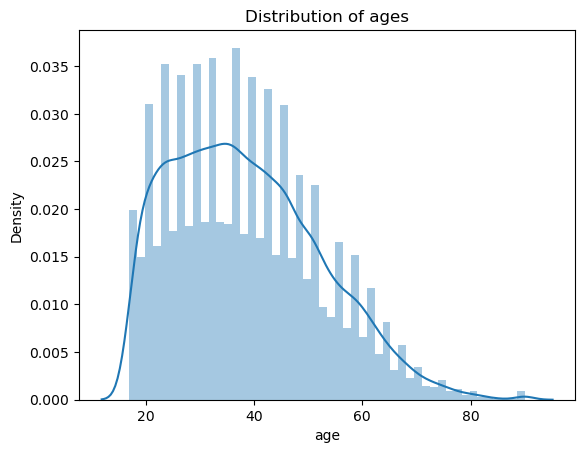

In [11]:
sns.distplot(data.age)
plt.title('Distribution of ages')
plt.show()

In [12]:
data['age'].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

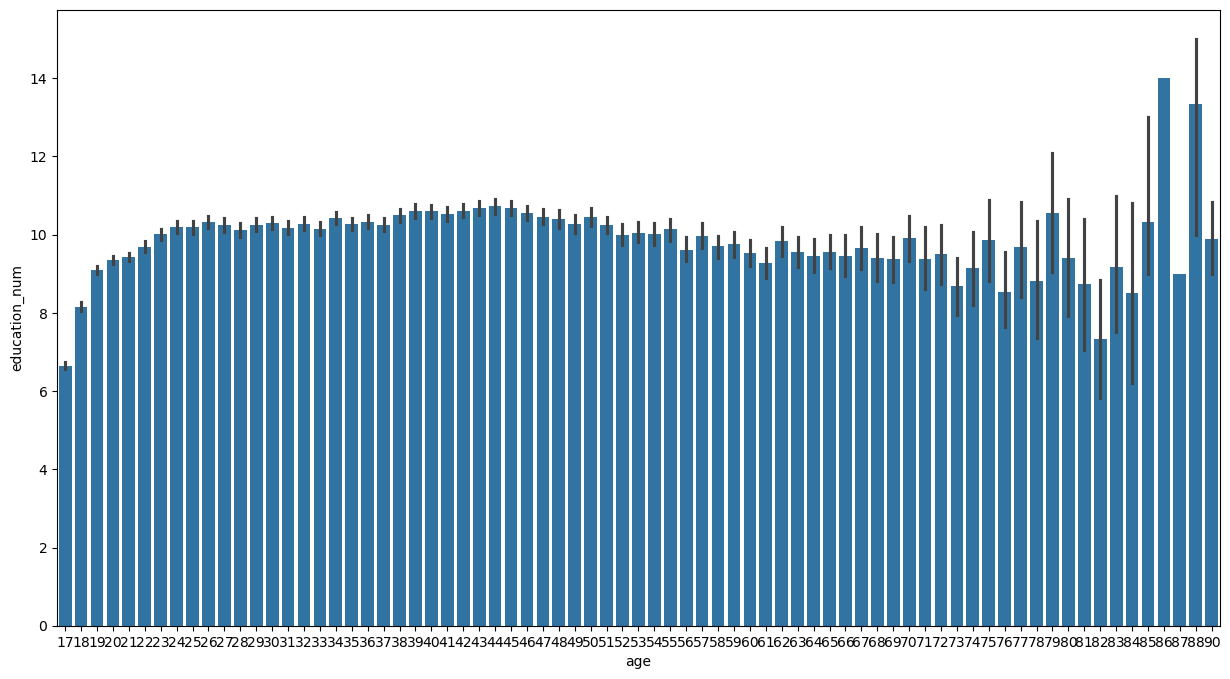

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x='age',y='education_num',data=data);

In [14]:
data.dropna(inplace=True)

### If the dataset has any null values remove

In [15]:
data.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K


In [16]:
data['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [18]:
data['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

### It was an imbalanced dataset

In [19]:
#data['income']=data['income'].map({'<=50K':0,'>50K':1})

In [20]:
data[32500:32510]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
32500,34,Private,60567,11th,7,Divorced,Transport-moving,Unmarried,White,Male,60,United-States,<=50K
32501,71,Private,138145,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,40,United-States,<=50K
32502,35,Local-gov,79649,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K
32503,47,Private,312088,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
32504,50,Private,208630,Masters,14,Divorced,Sales,Not-in-family,White,Female,50,United-States,>50K
32505,33,Private,182401,10th,6,Never-married,Adm-clerical,Not-in-family,Black,Male,40,United-States,<=50K
32506,38,Private,32916,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,55,United-States,>50K
32507,50,Private,302372,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K
32508,45,Private,155093,10th,6,Divorced,Other-service,Not-in-family,Black,Female,38,Dominican-Republic,<=50K
32509,32,Private,192965,HS-grad,9,Separated,Sales,Not-in-family,White,Female,45,United-States,<=50K


In [21]:
data['income'].isna().sum()

0

In [22]:
data['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [23]:
data['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [24]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [25]:
data["education"].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

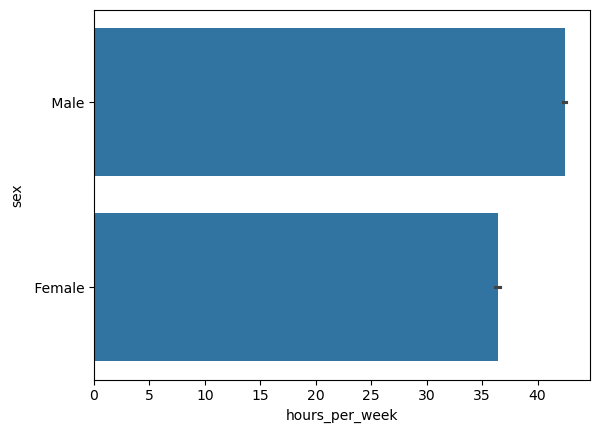

In [26]:
sns.barplot(x=data['hours_per_week'],y=data['sex'])
plt.show()

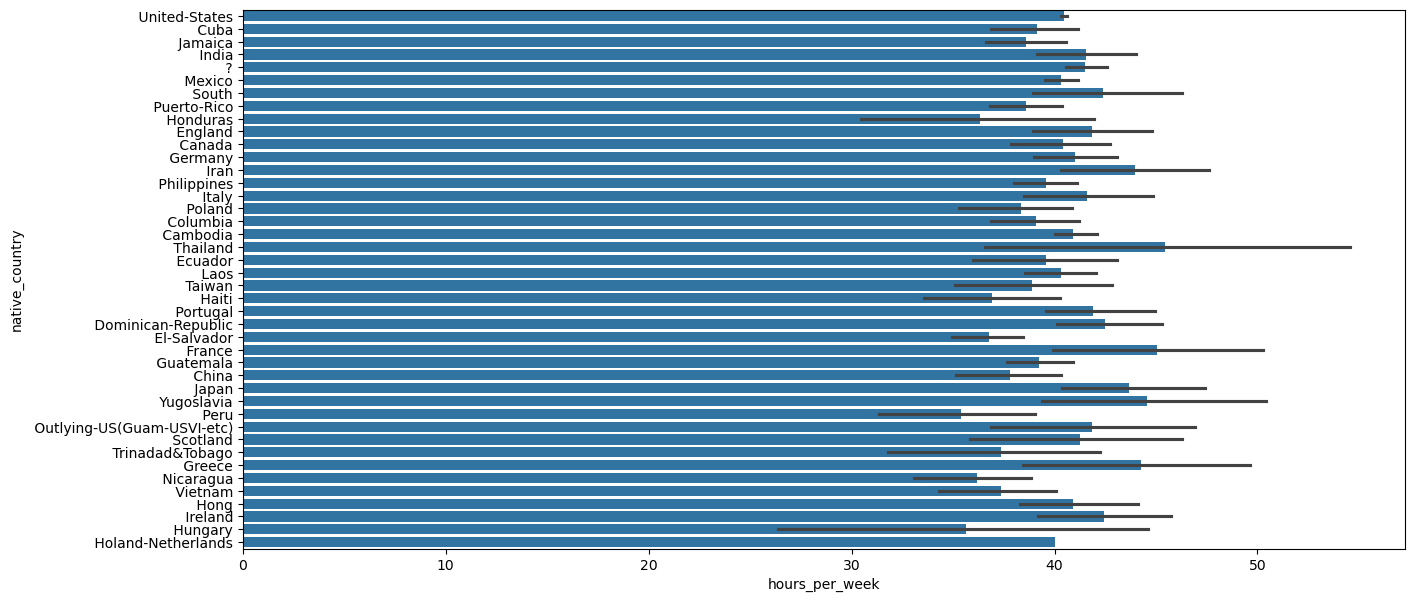

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(x=data['hours_per_week'],y=data['native_country'])
plt.show()

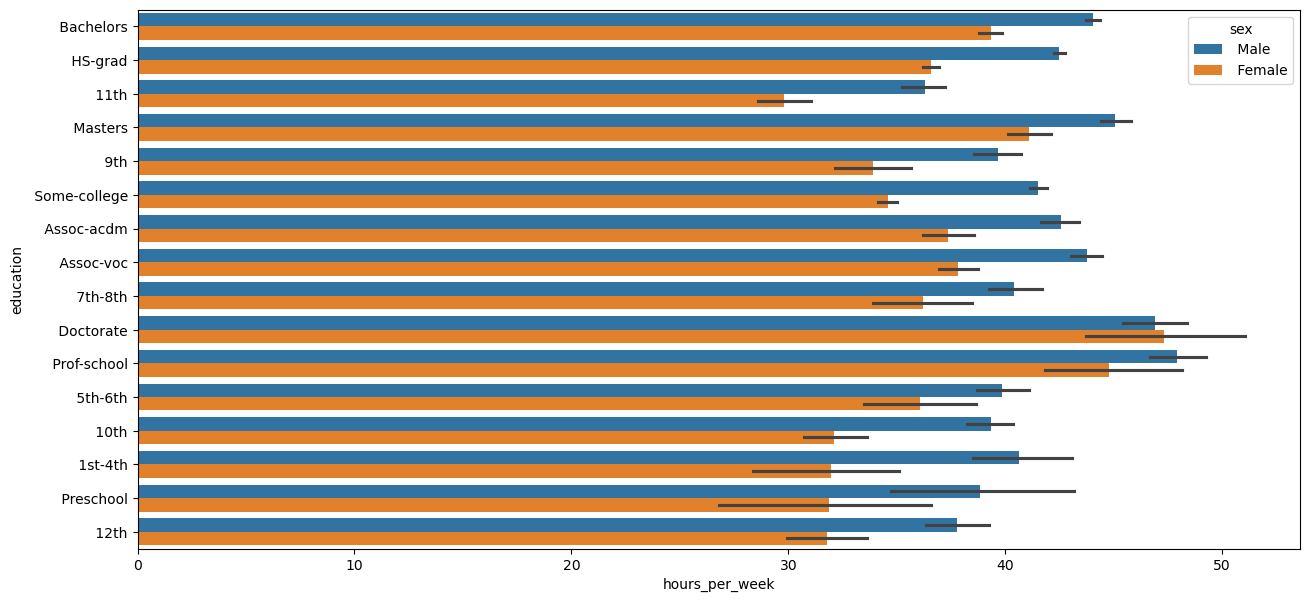

In [28]:
plt.figure(figsize=(15,7))
sns.barplot(x=data['hours_per_week'],y=data['education'],hue=data['sex'])
plt.show()

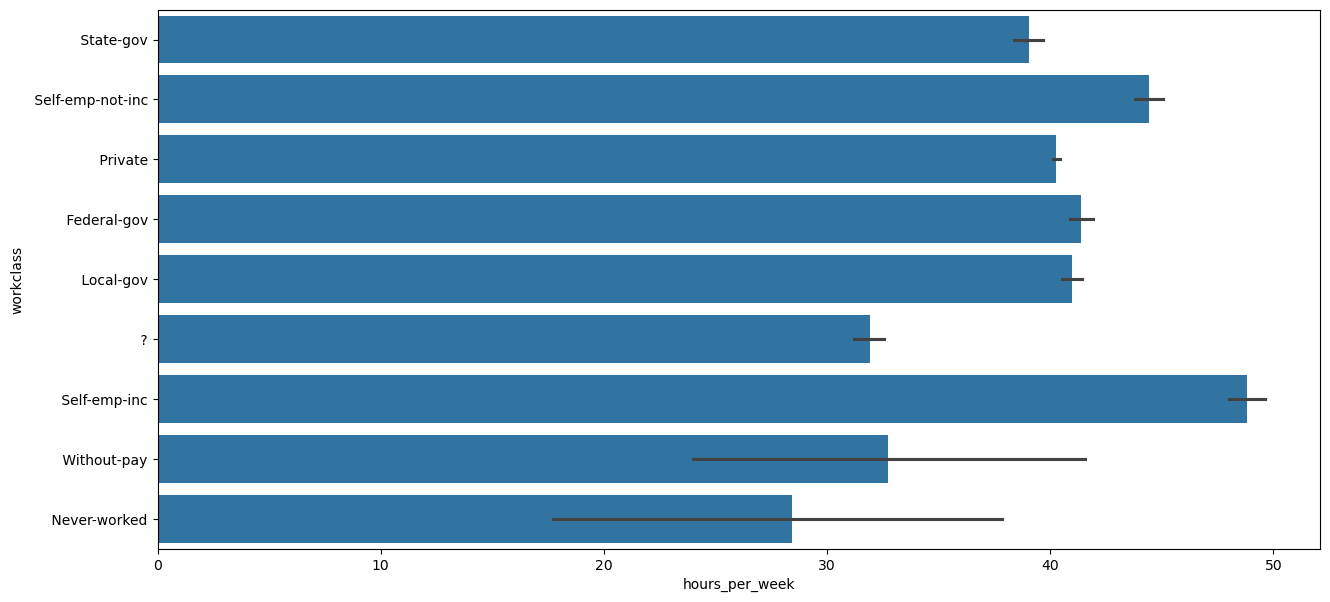

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x=data['hours_per_week'],y=data['workclass'])
plt.show()

In [30]:
data['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

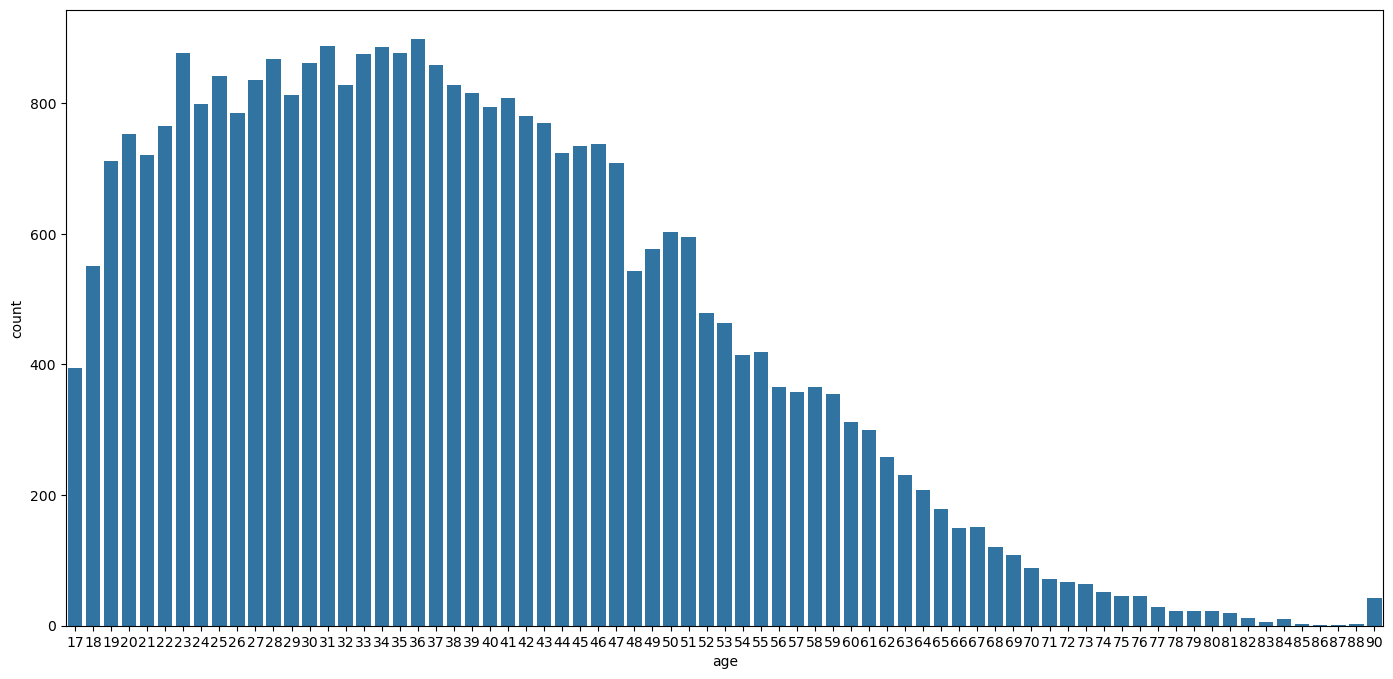

In [31]:
plt.figure(figsize=(17, 8))
sns.countplot(x='age', data=data) 
plt.show()

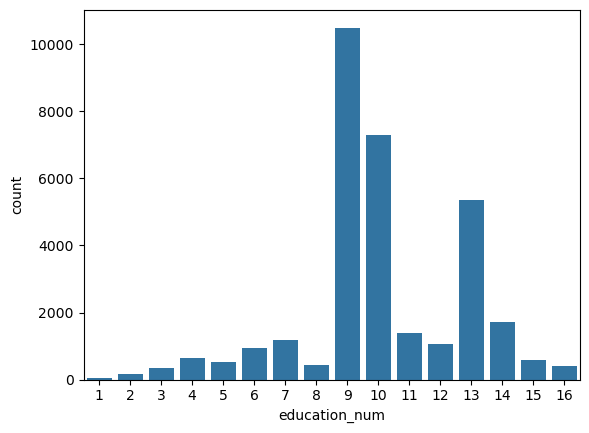

In [32]:
sns.countplot(x='education_num',data=data)
plt.show() 

### Data Cleaning

In [33]:
### Check for dupicate values

In [34]:
data.duplicated().sum()

26

In [35]:
duplicates = data[data.duplicated()]

In [36]:
duplicates

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,10,United-States,<=50K


In [37]:
data.drop_duplicates(inplace=True)

### Drop the duplicate values from dataset

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32535 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32535 non-null  int64 
 1   workclass       32535 non-null  object
 2   fnlwgt          32535 non-null  int64 
 3   education       32535 non-null  object
 4   education_num   32535 non-null  int64 
 5   marital_status  32535 non-null  object
 6   occupation      32535 non-null  object
 7   relationship    32535 non-null  object
 8   race            32535 non-null  object
 9   sex             32535 non-null  object
 10  hours_per_week  32535 non-null  int64 
 11  native_country  32535 non-null  object
 12  income          32535 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.5+ MB


In [39]:
data['workclass'].value_counts()

workclass
Private             22671
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [40]:
data['occupation'].value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3290
Machine-op-inspct    1999
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [43]:
data['native_country'].value_counts()  #united-states values 5times more than other values

native_country
United-States                 29151
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

### workclass,native Country,Occupation features has values with ?

### Replacing ? values with most occured values in their specific feature

In [44]:
data['workclass']=data['workclass'].replace(("?","Private"))

In [45]:
data['workclass'].value_counts()

workclass
Private             22671
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

<Axes: >

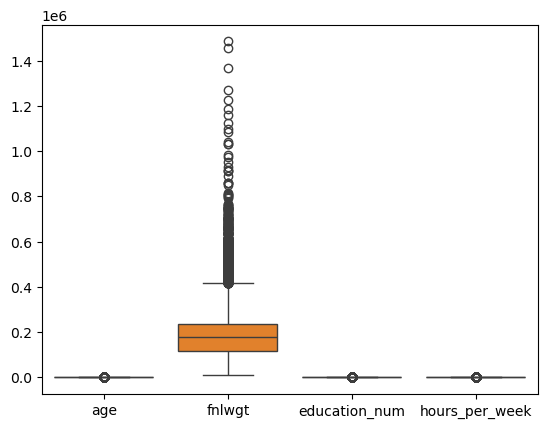

In [46]:
sns.boxplot(data)

In [47]:
data.describe()

,age,fnlwgt,education_num,hours_per_week
count,32535.000000,3.253500e+04,32535.000000,32535.000000
mean,38.586445,1.897819e+05,10.081850,40.441094
std,13.637887,1.055595e+05,2.571705,12.346525
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178215e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.369935e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [48]:
data['workclass']=data['workclass'].str.strip() 

data['workclass']=data['workclass'].replace("?","Private")

In [49]:
data['workclass'].value_counts()

workclass
Private             24507
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [50]:
data['native_country']=data['native_country'].str.strip()
data['native_country'] = data['native_country'].replace("?"," United-States")

In [51]:
data['native_country'].value_counts()

native_country
United-States                 29151
Mexico                          639
 United-States                  582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [52]:
data['occupation'] = data['occupation'].str.strip()
data['occupation'] = data['occupation'].replace("?","Prof-specialty")

In [53]:
data['occupation'].value_counts()

occupation
Prof-specialty       5979
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3290
Machine-op-inspct    1999
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

### All ? are replaced by most repeated values for particular features

In [55]:
data.head(1) 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K


In [56]:
data.occupation

0             Adm-clerical
1          Exec-managerial
2        Handlers-cleaners
3        Handlers-cleaners
4           Prof-specialty
               ...        
32556         Tech-support
32557    Machine-op-inspct
32558         Adm-clerical
32559         Adm-clerical
32560      Exec-managerial
Name: occupation, Length: 32535, dtype: object

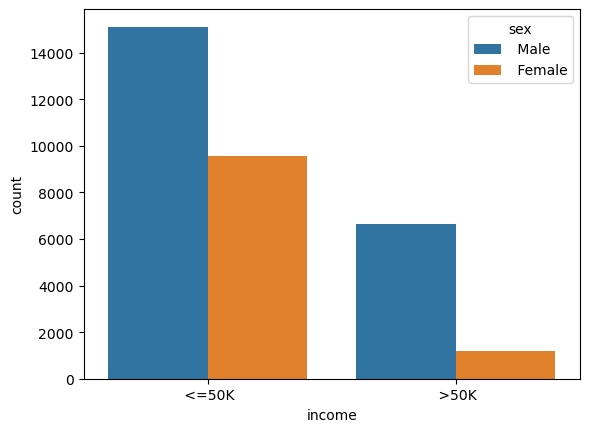

In [57]:
sns.countplot(x='income',hue='sex',data=data);

##### males are more in both income factors

#### Transformation and scaling is required because in features some values influences other values

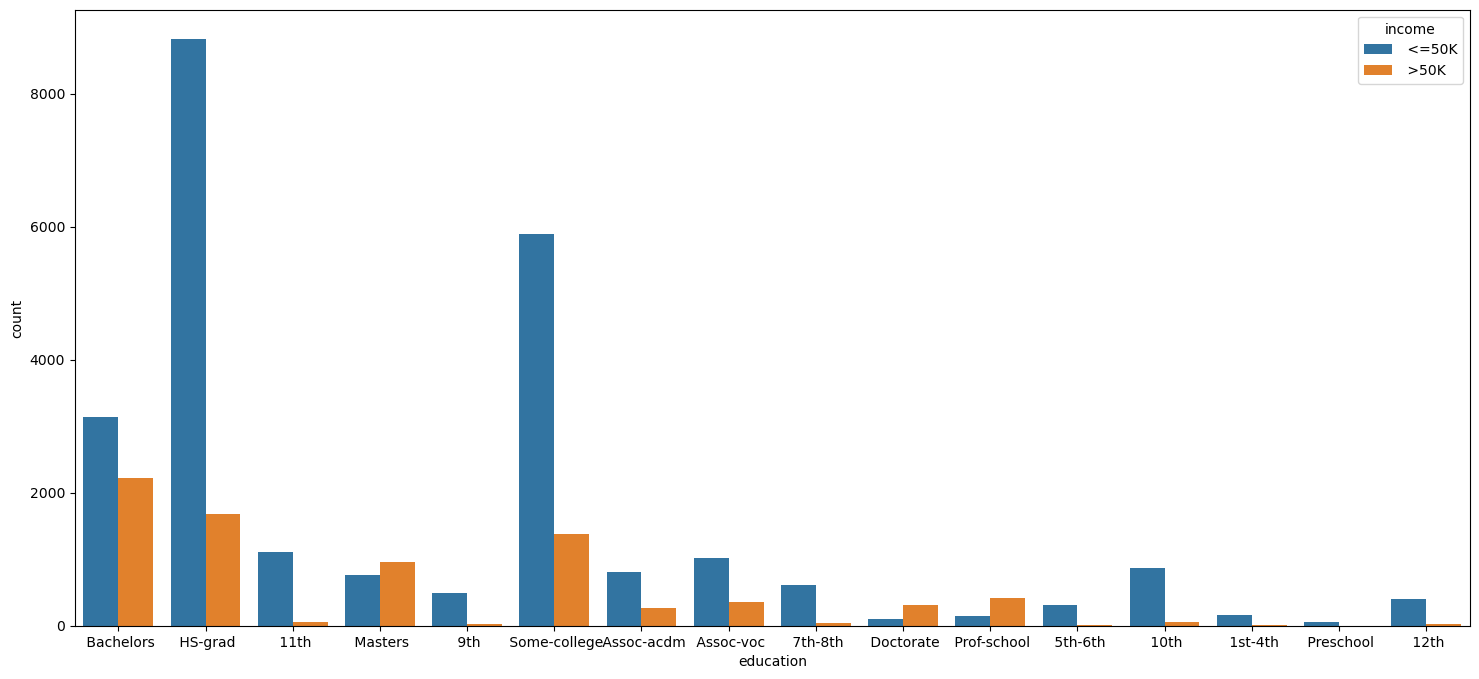

In [58]:
plt.figure(figsize=(18,8))
sns.countplot(x='education',hue='income',data=data);

#### Apply sqrt transformation

In [59]:
data['fnlwgt'] = data['fnlwgt'].apply(np.sqrt)

In [60]:
data['fnlwgt'].describe()

count    32535.000000
mean       418.883843
std        119.660653
min        110.837719
25%        343.251366
50%        422.322152
75%        486.819782
max       1218.484715
Name: fnlwgt, dtype: float64

<Axes: xlabel='age', ylabel='Density'>

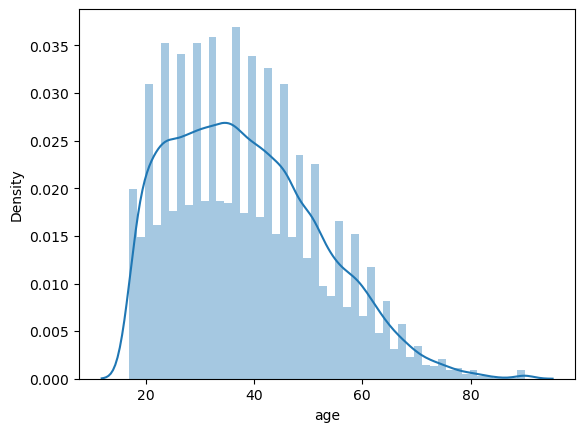

In [61]:
sns.distplot(data.age)

In [62]:
data['age'].skew()

0.5576041873709686

<Axes: ylabel='fnlwgt'>

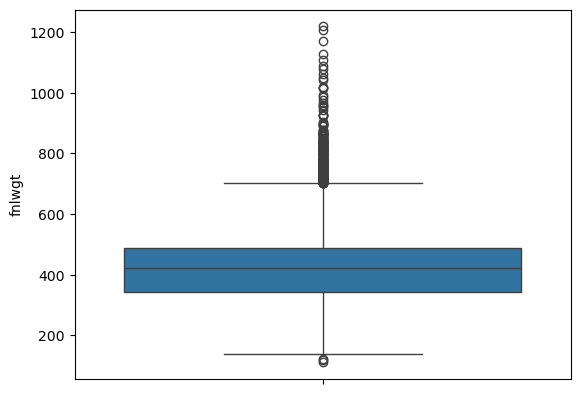

In [63]:
sns.boxplot(data.fnlwgt)

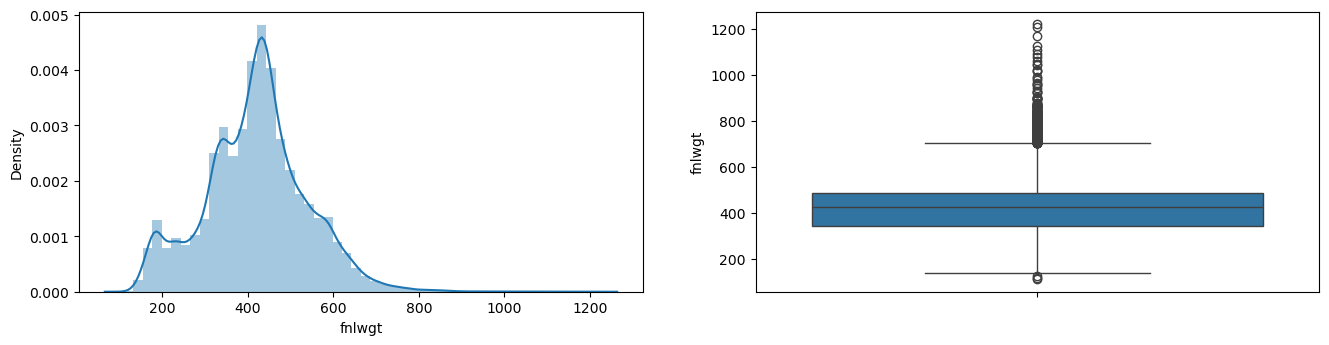

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data.fnlwgt)
plt.subplot(2,2,2)
sns.boxplot((data.fnlwgt))
plt.show()

In [65]:
percentile25 = data['fnlwgt'].quantile(0.25)
percentile75 = data['fnlwgt'].quantile(0.75)

In [66]:
percentile75

486.81978184923446

In [67]:
percentile25

343.2513655265102

iqr = percentile75 - percentile25

In [69]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

<Axes: xlabel='hours_per_week', ylabel='Density'>

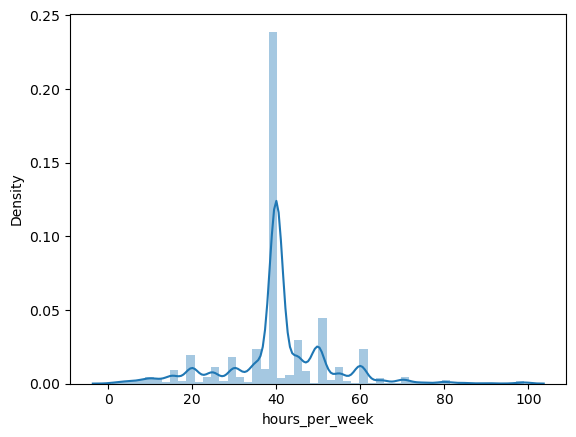

In [70]:
sns.distplot(data.hours_per_week)

### mostly no of hours work in a week was 40 hours

<Axes: xlabel='fnlwgt', ylabel='Density'>

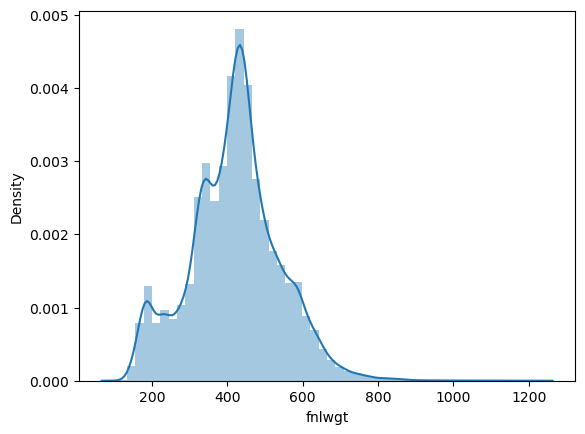

In [72]:
sns.distplot(data.fnlwgt)

## Encoding Data

In [73]:
from sklearn.preprocessing  import LabelEncoder

In [74]:
le = LabelEncoder()

In [75]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [76]:
data['workclass']  = le.fit_transform(data['workclass'])
data['education'] =  le.fit_transform(data['education'])
data['marital_status']  = le.fit_transform(data['marital_status'])
data['occupation']  = le.fit_transform(data['occupation'])
data['native_country']  = le.fit_transform(data['native_country'])
data['race']  = le.fit_transform(data['race'])
data['sex']  = le.fit_transform(data['sex'])
data['relationship']  = le.fit_transform(data['relationship'])
data['income'] = le.fit_transform(data['income'])

In [77]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,6,278.416954,9,13,4,0,1,4,1,40,39,0
1,50,5,288.636450,9,13,2,3,0,4,1,13,39,0
2,38,3,464.377002,11,9,0,5,1,4,1,40,39,0
3,53,3,484.480134,1,7,2,5,0,2,1,40,39,0
4,28,3,581.729318,9,13,2,9,5,2,0,40,5,0


In [78]:
data.corr().T

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
age,1.000000,0.040457,-0.071036,-0.010496,0.036214,-0.266123,0.001763,-0.263742,0.029143,0.088672,0.068438,-0.001505,0.234011
workclass,0.040457,1.000000,-0.025873,0.004828,0.003501,-0.020429,0.007159,-0.057922,0.048351,0.071571,0.042198,-0.004755,0.002699
fnlwgt,-0.071036,-0.025873,1.000000,-0.028976,-0.042073,0.027922,-0.000338,0.009692,-0.015441,0.024430,-0.021847,-0.057298,-0.005963
education,-0.010496,0.004828,-0.028976,1.000000,0.359098,-0.038456,-0.041249,-0.011089,0.014287,-0.027385,0.056070,0.063859,0.079393
education_num,0.036214,0.003501,-0.042073,0.359098,1.000000,-0.069167,0.070907,-0.094445,0.032017,0.012214,0.148429,0.050140,0.335268
marital_status,-0.266123,-0.020429,0.027922,-0.038456,-0.069167,1.000000,0.034849,0.185501,-0.067937,-0.129360,-0.190391,-0.023411,-0.199195
occupation,0.001763,0.007159,-0.000338,-0.041249,0.070907,0.034849,1.000000,-0.037437,-0.004810,0.047660,-0.012836,-0.009329,0.034519
relationship,-0.263742,-0.057922,0.009692,-0.011089,-0.094445,0.185501,-0.037437,1.000000,-0.116055,-0.582570,-0.248839,-0.005637,-0.250956
race,0.029143,0.048351,-0.015441,0.014287,0.032017,-0.067937,-0.004810,-0.116055,1.000000,0.087485,0.041947,0.137844,0.071862
sex,0.088672,0.071571,0.024430,-0.027385,0.012214,-0.129360,0.047660,-0.582570,0.087485,1.000000,0.229124,-0.008250,0.215967


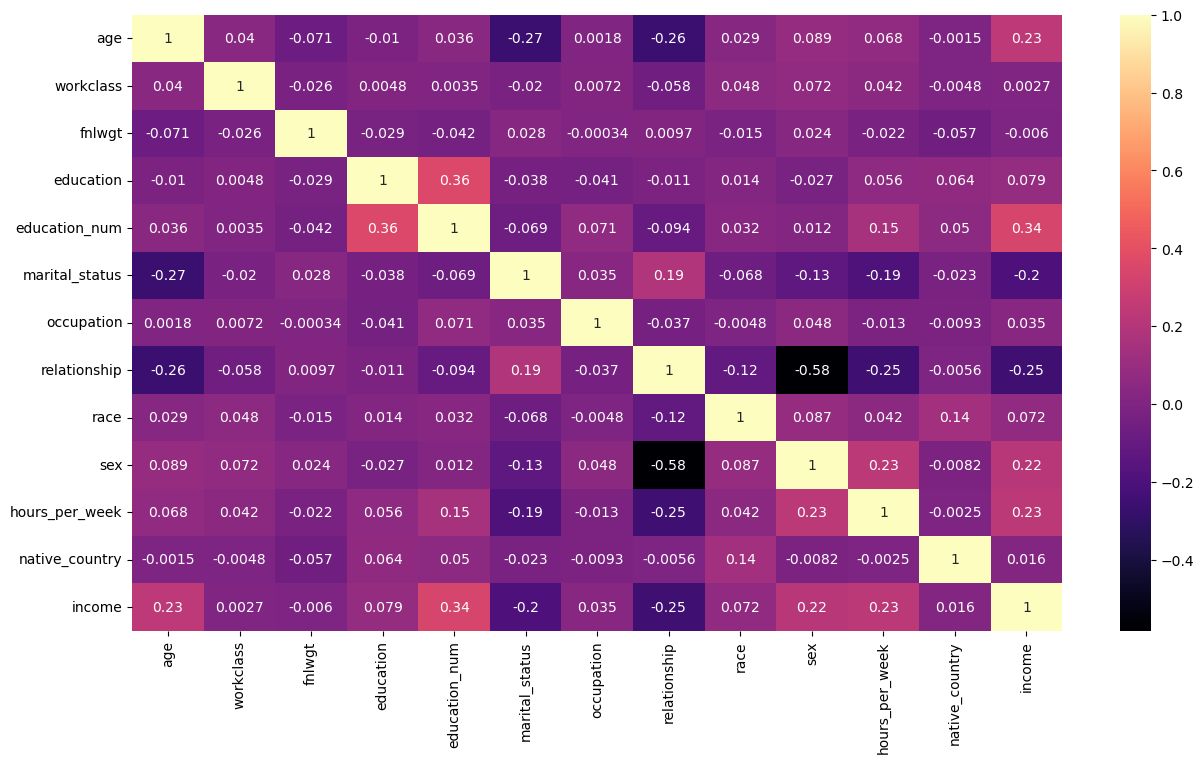

In [79]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='magma',annot = True);

#### checking correlation between features by using heatmap

In [80]:
data.shape

(32535, 13)

In [81]:
data.skew()

age               0.557604
workclass         0.076255
fnlwgt            0.189636
education        -0.934123
education_num    -0.309533
marital_status   -0.012728
occupation        0.000453
relationship      0.786588
race             -2.435229
sex              -0.719499
hours_per_week    0.228846
native_country   -3.660992
income            1.211593
dtype: float64

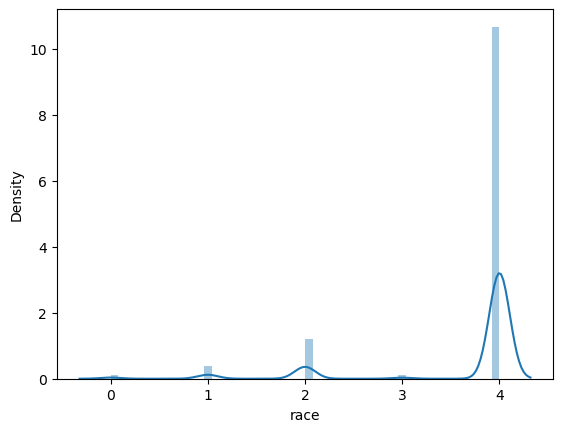

In [82]:
sns.distplot(data.race);

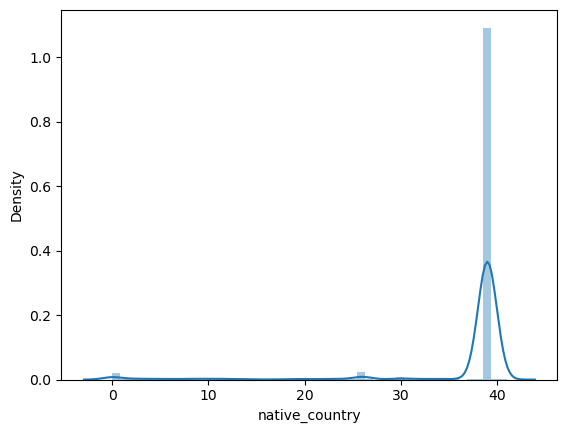

In [83]:
sns.distplot(data.native_country);

### Train and test split

In [84]:
X = data.iloc[:,:-1]
Y = data.income

In [85]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,39,6,278.416954,9,13,4,0,1,4,1,40,39
1,50,5,288.636450,9,13,2,3,0,4,1,13,39
2,38,3,464.377002,11,9,0,5,1,4,1,40,39
3,53,3,484.480134,1,7,2,5,0,2,1,40,39
4,28,3,581.729318,9,13,2,9,5,2,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,507.249446,7,12,2,12,5,4,0,38,39
32557,40,3,392.904569,11,9,2,6,0,4,1,40,39
32558,58,3,389.756334,11,9,6,0,4,4,0,40,39
32559,22,3,448.876375,11,9,4,0,3,4,1,20,39


In [86]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32535, dtype: int32

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [89]:
X_train.shape

(26028, 12)

In [90]:
X_test.shape

(6507, 12)

In [91]:
from sklearn.svm import SVC

In [92]:
model = SVC()

In [93]:
model.fit(X_train,y_train)

SVC()

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [94]:
y_pred = model.predict(X_test)

In [95]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [97]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7596


In [98]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[4943    0]
 [1564    0]]


In [99]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print(class_report)  # This works fine

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4943
           1       0.00      0.00      0.00      1564

    accuracy                           0.76      6507
   macro avg       0.38      0.50      0.43      6507
weighted avg       0.58      0.76      0.66      6507

